# Imports

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

## Loading existent dataset

In [3]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
training_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [5]:
training_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [7]:
i = 0
training_data.targets[i]

tensor(9)

In [6]:
training_data.targets.shape

torch.Size([60000])

In [3]:
training_data.data.shape

torch.Size([60000, 28, 28])

In [4]:
i = 0
training_data.data[i]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
         102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [5]:
i = 0
training_data.data[i].shape

torch.Size([28, 28])

In [25]:
print(f'Training data shape:\n{training_data.data.shape}\n')
print(f'Test data shape:\n{test_data.data.shape}\n')

Training data shape:
torch.Size([60000, 28, 28])

Test data shape:
torch.Size([10000, 28, 28])



### Other datasets



```
from torchvision import datasets

datasets.CIFAR10
datasets.CIFAR100
datasets.MNIST
.
.
.
```



### Get Data

In [ ]:
i = 0     # Index

Image shape:
torch.Size([28, 28])



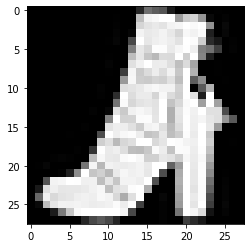

In [23]:
# Method 1
image = training_data.data[i]
print(f'Image shape:\n{image.shape}\n')

plt.imshow(training_data.data[i], cmap="gray")
plt.show()

Image shape:
torch.Size([1, 28, 28])

Image shape after squeezing:
torch.Size([28, 28])



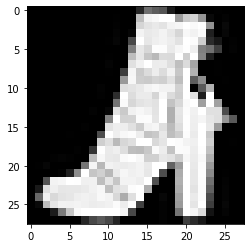

In [22]:
# Method 2
image, label = training_data[i]
print(f'Image shape:\n{image.shape}\n')

# Squeeze image
image = image.squeeze()
print(f'Image shape after squeezing:\n{image.shape}\n')

plt.imshow(image.squeeze(), cmap="gray")
plt.show()

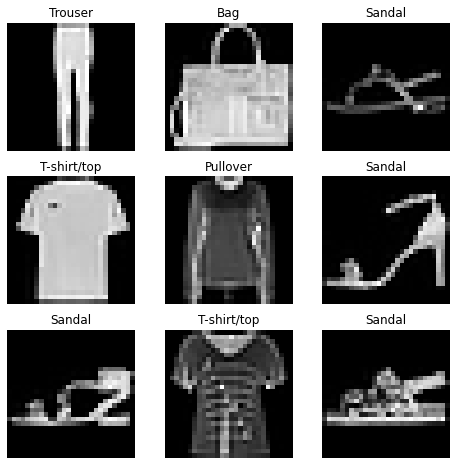

In [12]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    
    img, label = training_data[sample_idx]
    
    figure.add_subplot(rows, cols, i)
    
    plt.title(training_data.classes[label])
    plt.axis("off")
    
    plt.imshow(img.squeeze(), cmap="gray")

plt.show()

## Dataloader

In [28]:
batch_size = 64

train_dataloader = DataLoader(dataset=training_data,
                              batch_size=batch_size,
                              shuffle=True,
                              num_workers=0)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=batch_size,
                             shuffle=True,
                             num_workers=0)

Label: Ankle boot


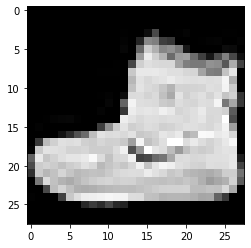

In [35]:
i = 0

image = train_dataloader.dataset.data[i]
label_index = train_dataloader.dataset.targets[i]
label = train_dataloader.dataset.classes[label_index]

print(f'Label: {label}')
plt.imshow(image, cmap='gray')
plt.show()

In [37]:
for batch_image, batch_label_index in train_dataloader:
  print(f'Image shape:\n{batch_image.shape}\n')
  print(f'Label index:\n{batch_label_index}\n')

  break

Image shape:
torch.Size([64, 1, 28, 28])

Label index:
tensor([2, 5, 5, 5, 5, 8, 0, 5, 4, 0, 8, 2, 8, 5, 4, 2, 4, 3, 5, 4, 2, 3, 5, 0,
        8, 6, 5, 2, 4, 3, 6, 2, 3, 9, 7, 0, 3, 6, 7, 8, 3, 2, 7, 1, 1, 0, 6, 2,
        9, 8, 6, 3, 4, 8, 1, 0, 4, 5, 6, 2, 6, 0, 7, 0])

